In [1]:
import pandas as pd

C:\Users\NIHARIKA\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
hb=pd.read_csv("headbrain.csv")

In [3]:
hb.isnull().sum()[hb.isnull().sum()>0]

Series([], dtype: int64)

In [4]:
hb.select_dtypes(include='object').columns

Index([], dtype='object')

In [5]:
hb.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
#hb=df1

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_hb,test_hb=train_test_split(hb,test_size=.2)
hb_train_x=train_hb.iloc[:,0:-1]
hb_train_y=train_hb.iloc[:,-1]
hb_test_x=test_hb.iloc[:,0:-1]
hb_test_y=test_hb.iloc[:,-1]


In [9]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(hb_train_x,hb_train_y)

LinearRegression()

In [10]:
Rsquare=lr1.score(hb_train_x,hb_train_y)#rsquare
Rsquare

0.626030331278822

In [11]:
N=hb_train_x.shape[0]
K=hb_train_x.shape[1]

In [12]:
Adquare=1-(1-Rsquare)*(N-1)/(N-K-1)
Adquare

0.6199659582725326

In [13]:
lr1.coef_

array([-21.86964823, -24.70333595,   0.24523052])

In [14]:
lr1.intercept_

462.5306287060364

In [15]:
pred_train=lr1.predict(hb_train_x)# as we can see our first predicted model value is same to manuaaly one 
pred_train

array([1269.80619896, 1369.90438447, 1305.22847305, 1149.88847252,
       1271.38666068, 1262.98387583, 1240.37853603, 1402.27481369,
       1355.0102695 , 1351.22273306, 1522.43777065, 1251.03252715,
       1237.19053921, 1274.77575646, 1202.72211384, 1162.21494576,
       1491.84890212, 1090.11717158, 1173.00508883, 1273.54960384,
       1151.85031672, 1411.41329012, 1191.88783921, 1237.43576973,
       1255.44667659, 1385.173624  , 1158.53648789, 1336.8632107 ,
       1228.71654943, 1179.56136597, 1251.65914015, 1380.02378299,
       1200.47090757, 1323.75691432, 1347.65335377, 1280.66128905,
       1474.12735735, 1436.36185659, 1259.75174745, 1268.58004633,
       1348.81455937, 1412.88467326, 1121.99713976, 1318.71615189,
       1157.35446683, 1347.40812325, 1366.96161818, 1270.05142948,
       1247.10883876, 1370.149615  , 1472.41074367, 1195.74658058,
       1500.61225398, 1298.60724889, 1231.0597761 , 1434.21972889,
       1049.40890453, 1384.68316296, 1183.05954033, 1349.08060

In [16]:
pred_test=lr1.predict(hb_test_x)# as we can see our first predicted model value is same to manuaaly one 
pred_test

array([1280.88570411, 1168.03553133, 1071.72488225, 1290.26941106,
       1244.16607247, 1272.30263576, 1580.06694389, 1440.28554498,
       1218.17163688, 1408.16034628, 1242.93991985, 1376.48147707,
       1285.85526162, 1223.3214779 , 1105.07623357, 1289.28848896,
       1386.1545461 , 1296.53632612, 1463.09198375, 1257.40852079,
       1208.9890289 , 1224.79286104, 1147.19093675, 1189.43553397,
       1288.73308089, 1355.68101406, 1268.44389439, 1477.62553171,
       1399.82250845, 1331.46813916, 1290.51464158, 1285.32066901,
       1233.5562129 , 1226.50947471, 1121.50667871, 1275.49063258,
       1400.33378496, 1395.16312849, 1272.6128133 , 1480.568298  ,
       1369.86025291, 1405.70804104, 1171.71398919, 1174.16629444,
       1298.74340084, 1356.72688317, 1170.79801411, 1435.62616501])

In [17]:
actual_pred = pd.DataFrame()
actual_pred['Actual']=hb_test_y
actual_pred['Pred']=pred_test

In [18]:
err_train_hb= hb_train_y-pred_train
err_test_hb=hb_test_y-pred_test

In [19]:
err_train_hb.mean()# almost mean is zero

-1.2752174389937882e-13

In [20]:
err_train_hb.skew()

0.411971048203405

In [21]:
err_train_hb.kurtosis()

0.5452368398054164

(array([ 2.,  3.,  2.,  3.,  7.,  5., 11., 13.,  9., 11., 15., 12., 15.,
        12., 17., 14.,  4., 13., 11.,  1.,  0.,  0.,  3.,  0.,  2.,  0.,
         2.,  0.,  1.,  1.]),
 array([-165.22251109, -151.50735476, -137.79219843, -124.0770421 ,
        -110.36188577,  -96.64672944,  -82.93157311,  -69.21641678,
         -55.50126045,  -41.78610412,  -28.07094779,  -14.35579146,
          -0.64063513,   13.0745212 ,   26.78967753,   40.50483386,
          54.21999019,   67.93514652,   81.65030285,   95.36545918,
         109.08061551,  122.79577184,  136.51092817,  150.2260845 ,
         163.94124083,  177.65639716,  191.3715535 ,  205.08670983,
         218.80186616,  232.51702249,  246.23217882]),
 <BarContainer object of 30 artists>)

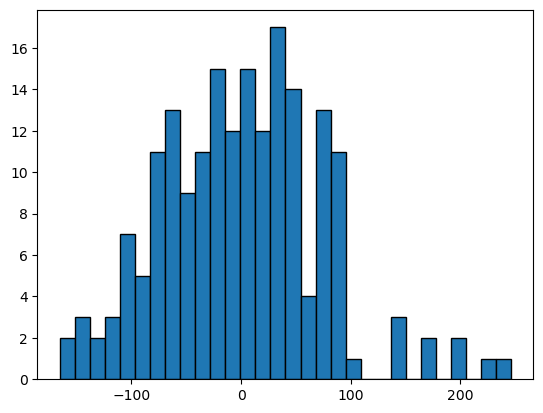

In [22]:
# to bcheck asuumption
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(err_train_hb,bins=30,edgecolor='black')

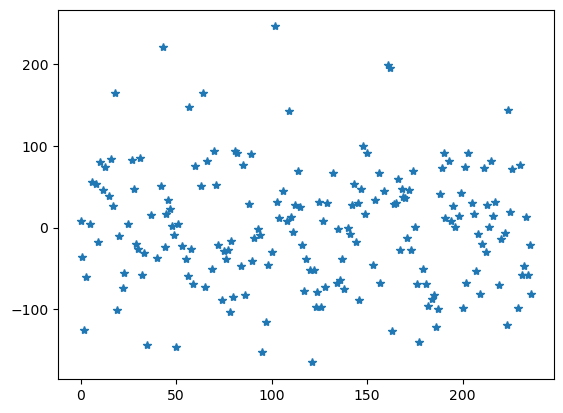

In [23]:
plt.plot(err_train_hb,'*')

<Axes: >

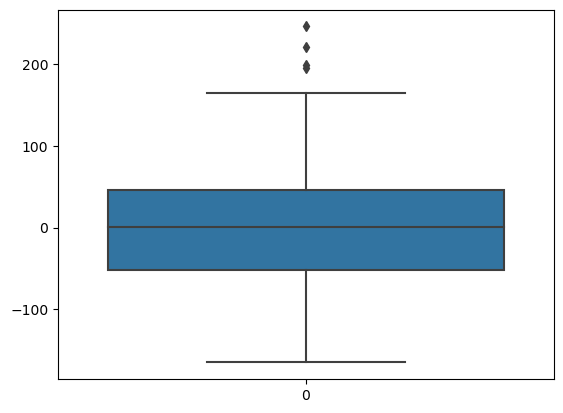

In [24]:
sns.boxplot(err_train_hb)

In [25]:
actual_pred = pd.DataFrame() 
actual_pred['Actual']=hb_train_y
actual_pred['Pred']=pred_train

In [26]:
import numpy as np

In [27]:
mse_train=np.mean(np.square(err_train_hb))
mse_train

5309.597235506763

In [28]:
mse_test=np.mean(np.square(err_test_hb))
mse_test

3825.169332125593

In [29]:
rmse_train=np.sqrt(mse_train)
rmse_train


72.8669831645771

In [30]:
rmse_test=np.sqrt(mse_test)
rmse_test

61.847953338211546

In [31]:
mape_train=np.mean(np.abs(err_train_hb*100/hb_train_y))
mape_test=np.mean(np.abs(err_test_hb*100/hb_test_y))

In [32]:
mape_train

4.49427288266531

In [33]:
mape_test

3.5835473972044665

In [34]:
def remove_outliers(df,col,k):
    mean=df[col].mean()
    global df1,var1
    sd=df[col].std()
    var1=[x for x in df[col]if (x>mean-k*sd)]
    var1=[x for x in df[col]if (x<mean+k*sd)]
    df1=df.loc[df[col].isin(var1)];
    print(df1.shape)
    print("number of outliers removed -->",df.shape[0]-df1.shape[0])

In [35]:
remove_outliers(hb,'Brain Weight(grams)',2)

(229, 4)
number of outliers removed --> 8


In [36]:
#Housing 
hh=pd.read_csv("housing.csv")

In [37]:
hh.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [38]:
df=pd.DataFrame(hh.isnull().sum()[hh.isnull().sum()>0])

In [39]:
df.columns=['NullsCount']
df=df.sort_values('NullsCount',ascending=False)
df

,NullsCount
total_bedrooms,207


In [40]:
hh.total_bedrooms.fillna(280.0,inplace=True)

C:\Users\NIHARIKA\AppData\Local\Temp\ipykernel_12088\2954158109.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hh.total_bedrooms.fillna(280.0,inplace=True)


In [41]:
hh.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [42]:
[hh.select_dtypes(include='object').columns]

[Index(['ocean_proximity'], dtype='object')]

In [43]:
hh.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [44]:
hh.ocean_proximity.replace({'NEAR BAY':0, '<1H OCEAN':1, 'INLAND':2, 'NEAR OCEAN':3, 'ISLAND':4}, inplace =True)

C:\Users\NIHARIKA\AppData\Local\Temp\ipykernel_12088\360537598.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hh.ocean_proximity.replace({'NEAR BAY':0, '<1H OCEAN':1, 'INLAND':2, 'NEAR OCEAN':3, 'ISLAND':4}, inplace =True)
C:\Users\NIHARIKA\AppData\Local\Temp\ipykernel_12088\360537598.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_optio

In [45]:
[hh.select_dtypes(include='object').columns]

[Index([], dtype='object')]

In [46]:
hh.isnull().sum()[hh.isnull().sum()>0]

Series([], dtype: int64)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train_hh,test_hh=train_test_split(hh,test_size=.2)
hh_train_x=train_hh.iloc[:,0:-1]
hh_train_y=train_hh.iloc[:,-1]
hh_test_x=test_hh.iloc[:,0:-1]
hh_test_y=test_hh.iloc[:,-1]

In [49]:
from sklearn.linear_model import LinearRegression
lr2=LinearRegression()
lr2.fit(hh_train_x,hh_train_y)

LinearRegression()

In [50]:
Rsquare=lr2.score(hh_train_x,hh_train_y)#rsquare
Rsquare

0.6350648405499076

In [51]:
N=hh_train_x.shape[0]
K=hh_train_x.shape[1]

In [52]:
Adquare=1-(1-Rsquare)*(N-1)/(N-K-1)
Adquare

0.6348658091334096

In [53]:
lr2.coef_

array([-4.19152308e+04, -4.18306094e+04,  1.12240569e+03, -5.73948075e+00,
        8.41043443e+01, -3.88843947e+01,  6.93940860e+01,  3.94511569e+04,
       -2.99294287e+03])

In [54]:
lr2.intercept_

-3504015.897581551

In [55]:
pred_train=lr2.predict(hh_train_x)# as we can see our first predicted model value is same to manuaaly one 
pred_train

array([149635.40572684, 237206.51226878, 220618.87437153, ...,
       186368.31279942, 316540.90019203, 191399.67822464])

In [56]:
pred_test=lr2.predict(hh_test_x)# as we can see our first predicted model value is same to manuaaly one 
pred_test

array([175607.01054031,  42952.96903937, 143647.52994678, ...,
       130683.87674411, 139001.37155647, 212365.11707687])

In [57]:
actual_pred = pd.DataFrame()
actual_pred['Actual']=hh_test_y
actual_pred['Pred']=pred_test

In [58]:
err_train_hh= hh_train_y-pred_train
err_test_hh=hh_test_y-pred_test

In [59]:
err_train_hh.mean()

-9.234261865070624e-10

In [60]:
err_train_hh.skew()

1.216599178634291

In [61]:
err_train_hh.kurtosis()

4.243719510065406

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        6.000e+00, 7.000e+00, 7.400e+01, 3.110e+02, 2.019e+03, 5.427e+03,
        4.513e+03, 2.158e+03, 9.800e+02, 4.930e+02, 2.780e+02, 1.370e+02,
        6.000e+01, 2.800e+01, 1.100e+01, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-553714.35978519, -508822.17137721, -463929.98296922,
        -419037.79456123, -374145.60615325, -329253.41774526,
        -284361.22933727, -239469.04092928, -194576.8525213 ,
        -149684.66411331, -104792.47570532,  -59900.28729734,
         -15008.09888935,   29884.08951864,   74776.27792662,
         119668.46633461,  164560.6547426 ,  209452.84315058,
         254345.03155857,  299237.21996656,  344129.40837454,
         389021.59678253,  433913.78519052,  478805.97359851,
         523698.16200649,  568590.35041448,  613482.53882247,
         658374.72723045,  703266.91563844,  748159.10404643,
        

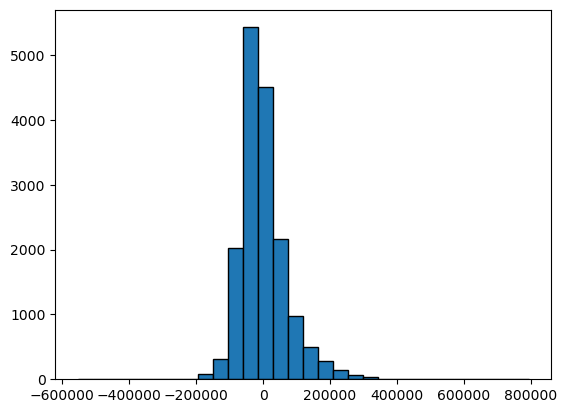

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(err_train_hh,bins=30,edgecolor='black')

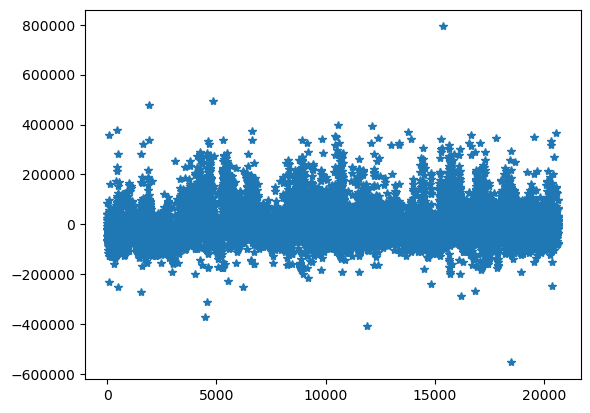

In [63]:
plt.plot(err_train_hh,'*')

<Axes: >

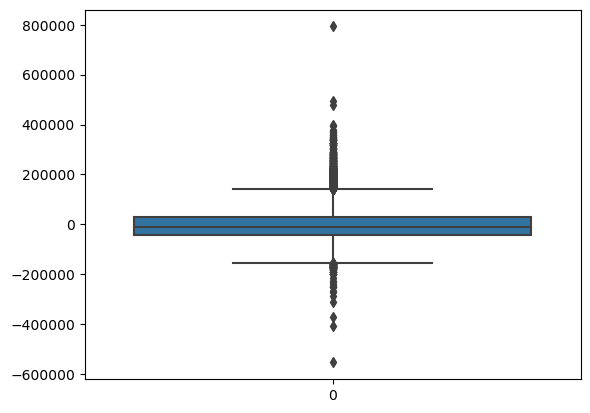

In [64]:
sns.boxplot(err_train_hh)

In [65]:
actual_pred = pd.DataFrame()#empty data frame 
actual_pred['Actual']=hh_train_y#created colum in which valu taken from train 
actual_pred['Pred']=pred_train

In [66]:
import numpy as np

In [67]:
mse_train=np.mean(np.square(err_train_hh))
mse_train

4849401375.181607

In [68]:
mse_test=np.mean(np.square(err_test_hh))
mse_test

4861543129.259391

In [69]:
rmse_train=np.sqrt(mse_train)
rmse_train

69637.64337756991

In [70]:
rmse_test=np.sqrt(mse_test)
rmse_test

69724.76697171092

In [71]:
mape_train=np.mean(np.abs(err_train_hh*100/hh_train_y))
mape_test=np.mean(np.abs(err_test_hh*100/hh_test_y))

In [72]:
mape_train

30.295335217475053

In [73]:
mape_test

30.6163689445588

In [74]:
def remove_outliers(df,col,k):
    mean=df[col].mean()
    global df1,var1
    sd=df[col].std()
    var1=[x for x in df[col]if (x>mean-k*sd)]
    var1=[x for x in df[col]if (x<mean+k*sd)]
    df1=df.loc[df[col].isin(var1)];
    print(df1.shape)
    print("number of outliers removed -->",df.shape[0]-df1.shape[0])

In [75]:
remove_outliers(hh,'median_house_value',2)

(19257, 10)
number of outliers removed --> 1383
